In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

In [9]:
edges = pl.read_csv("edgelists1.csv") #loading data
nodes = pl.read_csv("node_info1.csv")
print(edges)

id_list = edges['id'].unique(maintain_order=True).to_list() #keeps the main order
#id_list = sorted(edges['id'].unique().to_list()) #alphabetical sort 
print(id_list)

all_deg = []


def makegraph(a): 
    edges_group = edges.filter(pl.col('id') == a)
    G = nx.from_pandas_edgelist(edges_group, source = 'from', target = 'to') #Get the information from the tables df with node being from, target being to, and edges from connectivity (which one the node is connected to)
    #nx.draw(G, node_color = 'blue', node_size = 10, edgecolors='black', alpha = 0.7) #This draws the graph with specified node color, size, edge color and transparency
    #plt.title(a)  # add a title for each graph
    #plt.show()
    degrees = [d for n, d in G.degree()] #for each node in the node/degree dict, takes just the degrees into a list
    less2 = [d for d in degrees if d < 2]
    p = len(less2)/len(degrees)
    r = 2
    md = np.mean(degrees)
    vd = np.var(degrees)
    return md, vd

mean_degree = []
var_degree = []
for idx in id_list:
    md, vd = makegraph(idx)
    mean_degree.append(md.item())
    var_degree.append(vd.item())
#for i in id_list: #there's 382 networks so idk how we can make all of them and display 
#    makegraph(i)






shape: (3_259, 3)
┌─────────────────────┬──────┬─────┐
│ id                  ┆ from ┆ to  │
│ ---                 ┆ ---  ┆ --- │
│ str                 ┆ str  ┆ str │
╞═════════════════════╪══════╪═════╡
│ aus.2000.meas.1.00  ┆ P1   ┆ P2  │
│ aus.2000.meas.1.00  ┆ P1   ┆ P3  │
│ aus.2000.meas.1.00  ┆ P3   ┆ P4  │
│ aus.2000.meas.1.00  ┆ P3   ┆ P5  │
│ aus.2003.meas.1.00  ┆ P1   ┆ P2  │
│ …                   ┆ …    ┆ …   │
│ rou.2020.covid.1.16 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.17 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.18 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.19 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.20 ┆ P1   ┆ P2  │
└─────────────────────┴──────┴─────┘
['aus.2000.meas.1.00', 'aus.2003.meas.1.00', 'aus.2010.meas.1.00', 'bgd.2001.nph.1.01', 'bgd.2001.nph.1.02', 'bgd.2001.nph.1.03', 'bgd.2001.nph.1.04', 'bgd.2001.nph.1.05', 'bgd.2001.nph.1.06', 'bgd.2001.nph.1.07', 'bgd.2001.nph.1.08', 'bgd.2001.nph.1.11', 'bgd.2001.nph.1.12', 'bgd.2001.nph.1.13', 'bgd.2001.nph.1.14', 'bgd.2001.nph.1.15', 'bgd.2001.nph

In [10]:
mean_degree

[1.6,
 1.9090909090909092,
 1.7777777777777777,
 1.3333333333333333,
 1.6,
 1.6,
 1.6666666666666667,
 1.0,
 1.0,
 1.3333333333333333,
 1.0,
 1.6,
 1.8333333333333333,
 1.0,
 1.5,
 1.7142857142857142,
 1.0,
 1.9411764705882353,
 1.9473684210526316,
 1.9746835443037976,
 1.0,
 1.9714285714285715,
 1.95,
 1.9375,
 1.0,
 1.0,
 1.75,
 1.5,
 1.9393939393939394,
 1.7142857142857142,
 1.935483870967742,
 1.3333333333333333,
 1.3333333333333333,
 1.0,
 1.6666666666666667,
 1.945945945945946,
 1.9714285714285715,
 1.8181818181818181,
 1.7777777777777777,
 1.8666666666666667,
 1.9523809523809523,
 1.6666666666666667,
 1.9090909090909092,
 1.3333333333333333,
 1.8888888888888888,
 1.75,
 1.6666666666666667,
 1.3333333333333333,
 1.0,
 1.5,
 1.0,
 1.9591836734693877,
 1.8571428571428572,
 1.989247311827957,
 1.9393939393939394,
 1.7777777777777777,
 1.951219512195122,
 1.9,
 1.96,
 1.8823529411764706,
 1.9047619047619047,
 1.8888888888888888,
 1.9090909090909092,
 1.9130434782608696,
 1.8823529411

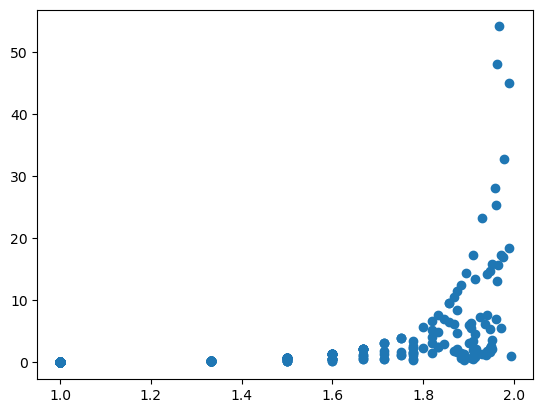

In [11]:
plt.scatter(mean_degree, var_degree)

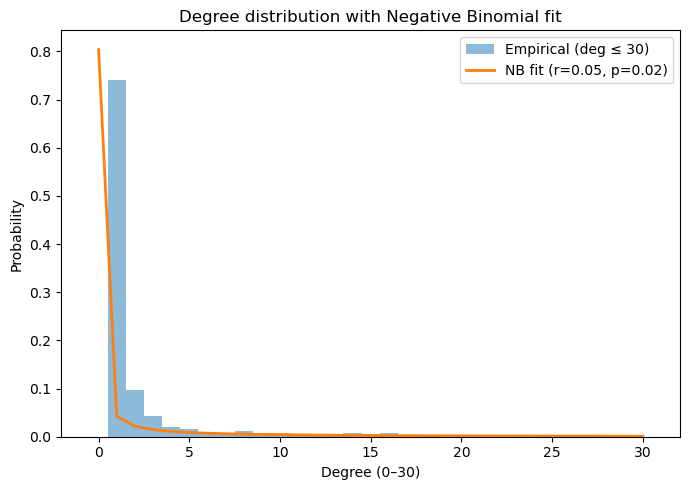

In [12]:
# Plot degree histogram with Negative Binomial (NB) fit only 


import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Load data
edges_df = pl.read_csv("edgelists1.csv")
nodes_df = pl.read_csv("node_info1.csv")

# Build edge list and node list as strings
uv_cols = edges_df.columns[:2]
edges = [(str(u), str(v)) for u, v in edges_df.select(uv_cols).rows()]
node_col = nodes_df.columns[0]
nodes = [str(x[0]) for x in nodes_df.select([node_col]).rows()]

# Graph + degrees
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
deg = np.array([d for _, d in G.degree()], dtype=float)

# Method-of-moments NB parameters (for support {0,1,2,...})
m = deg.mean()
s2 = deg.var(ddof=1) if deg.size else 0.0
if deg.size == 0:
    raise ValueError("Empty degree sequence.")
if s2 > m and m > 0:
    r_hat = (m**2) / (s2 - m)
    p_hat = r_hat / (r_hat + m)
else:
    # fallback toward Poisson-like when no overdispersion
    r_hat = 1e9
    p_hat = r_hat / (r_hat + m) if m > 0 else 0.999999999

# Discrete histogram + NB PMF
deg_int = deg.astype(int)
xmax = int(deg_int.max()) if deg_int.size else 0
x = np.arange(0, xmax + 1)

pmf_nb = nbinom.pmf(x, r_hat, p_hat, loc=0)

max_plot = 30
x = np.arange(0, min(xmax, max_plot) + 1)
pmf_nb = nbinom.pmf(x, r_hat, p_hat, loc=0)

plt.figure(figsize=(7, 5))
plt.hist(deg_int[deg_int <= max_plot],
         bins=np.arange(-0.5, max_plot + 1.5, 1),
         density=True, alpha=0.5, label="Empirical (deg ≤ 30)")
plt.plot(x, pmf_nb, lw=2, label=f"NB fit (r={r_hat:.2f}, p={p_hat:.2f})")
plt.xlabel("Degree (0–30)")
plt.ylabel("Probability")
plt.title("Degree distribution with Negative Binomial fit")
plt.legend()
plt.tight_layout()
plt.show()




=== chn.2003.sars.1.00 ===
Cases: 79
Mean (R0 proxy): 0.9873
Variance:        18.1152
k (dispersion):  0.0569156
p:               0.054503


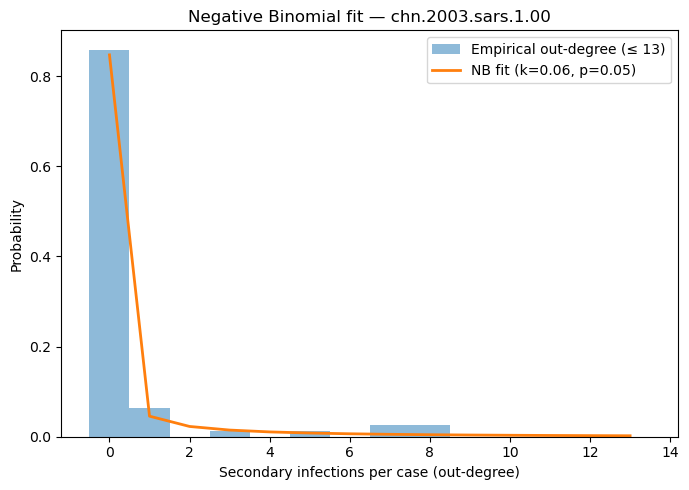


=== kor.2015.mers.1.00 ===
Cases: 186
Mean (R0 proxy): 0.9946
Variance:        45.5189
k (dispersion):  0.0222188
p:               0.021851


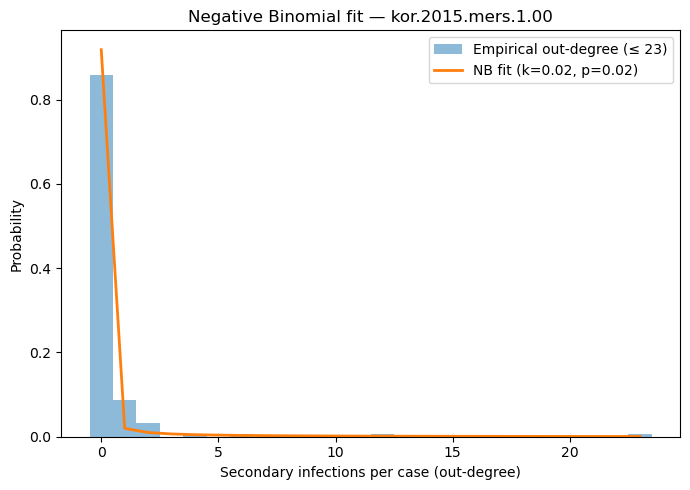


=== chn.2020.covid.1.00 ===
Cases: 20
Mean (R0 proxy): 0.9500
Variance:        3.6289
k (dispersion):  0.336886
p:               0.261784


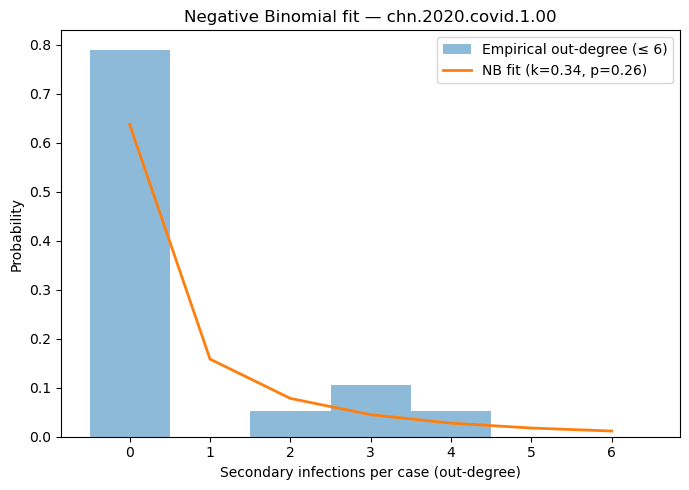

In [13]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  # for PMF curve

EDGES_PATH = "edgelists1.csv"
TARGET_DISEASES = ["chn.2003.sars.1.00", "kor.2015.mers.1.00", "chn.2020.covid.1.00"]

# --- load edges (id, from, to) ---
edges_df = pl.read_csv(EDGES_PATH)  # columns: id, from, to (all strings)

# Build a namespaced DiGraph to avoid P1 collisions across outbreaks
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"
    v_ns = f"{rid}:{v}"
    G.add_edge(u_ns, v_ns)

# Method-of-moments NB fit on {0,1,2,...}
def fit_nb_mom(sample):
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)
    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0
    if m <= 0:
        return dict(mean=m, var=s2, k=np.inf, p=1.0)
    if s2 > m:
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        k = 1e12  # ~Poisson
        p = k / (k + m)
    return dict(mean=m, var=s2, k=k, p=p)

# Fit NB and (optionally) plot for each target outbreak
for outbreak in TARGET_DISEASES:
    # nodes belonging to this outbreak (by namespace prefix)
    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    H = G.subgraph(nodes_d).copy()
    # secondary infections per case = out-degree
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)

    fit = fit_nb_mom(deg_out)
    print(f"\n=== {outbreak} ===")
    print(f"Cases: {len(deg_out)}")
    print(f"Mean (R0 proxy): {fit['mean']:.4f}")
    print(f"Variance:        {fit['var']:.4f}")
    print(f"k (dispersion):  {fit['k']:.6g}")
    print(f"p:               {fit['p']:.6f}")

    # NB-only plot (zoom to make readable)
    if len(deg_out) > 0:
        xmax_plot = min(int(np.percentile(deg_out, 99)), 40)
        x = np.arange(0, xmax_plot + 1)
        pmf_nb = nbinom.pmf(x, fit["k"], fit["p"], loc=0)

        plt.figure(figsize=(7, 5))
        plt.hist(
            deg_out[deg_out <= xmax_plot],
            bins=np.arange(-0.5, xmax_plot + 1.5, 1),
            density=True, alpha=0.5, label=f"Empirical out-degree (≤ {xmax_plot})"
        )
        plt.plot(x, pmf_nb, lw=2, label=f"NB fit (k={fit['k']:.2f}, p={fit['p']:.2f})")
        plt.xlabel("Secondary infections per case (out-degree)")
        plt.ylabel("Probability")
        plt.title(f"Negative Binomial fit — {outbreak}")
        plt.legend()
        plt.tight_layout()
        plt.show()


For each target outbreak ID:

Compute secondary infections per node = how many people each case infected (out-degree).

Plot a scatter of those per-node counts (one figure per disease).

Compute the mean and variance of those counts.

After looping through all diseases, plot a combined scatter of mean vs. variance (one point per disease).

Save a CSV summary (secondary_infection_stats.csv) with the metrics.

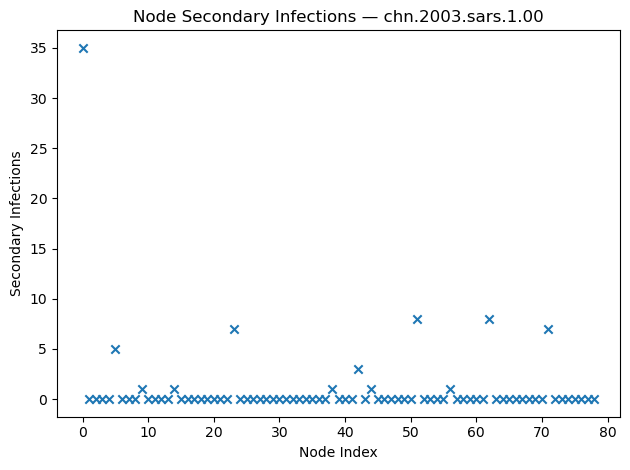

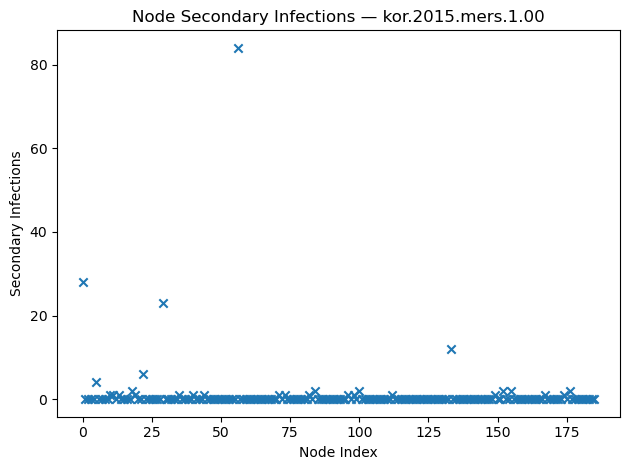

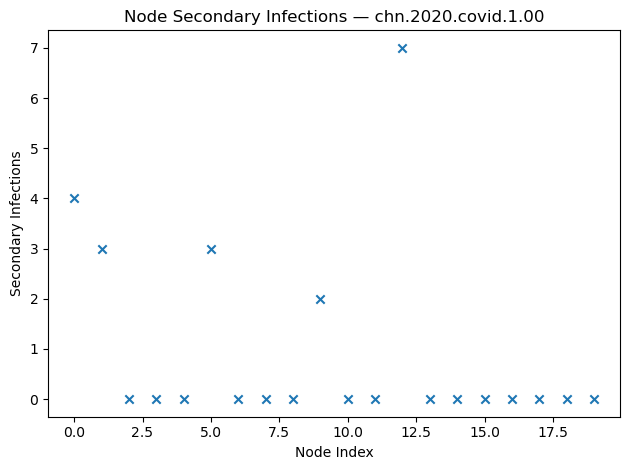

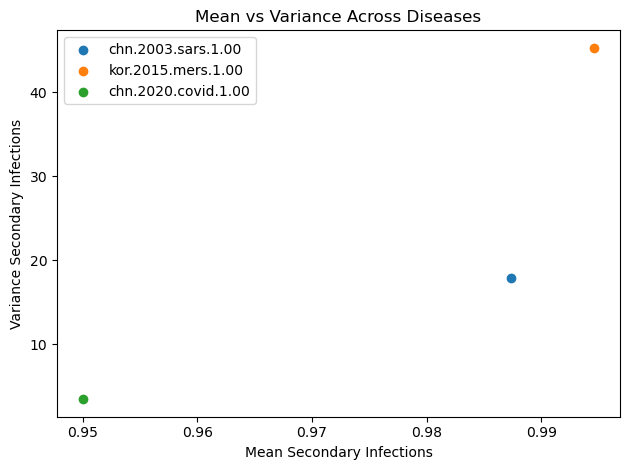

Saved summary to /Users/adazhang/Developer/BIOL4559/Final Project /secondary_infection_stats.csv


In [2]:


import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

EDGES_CSV = "edgelists1.csv"
NODES_CSV = "node_info1.csv"
TARGET_DISEASES = ["chn.2003.sars.1.00", "kor.2015.mers.1.00", "chn.2020.covid.1.00"]

def per_disease_secondary_counts(edges: pl.DataFrame, nodes: pl.DataFrame, disease_id: str) -> pl.DataFrame:
    e = edges.filter(pl.col("id") == disease_id)
    n = nodes.filter(pl.col("id") == disease_id).select("name")

    # out-degree = number of times a case appears as `from` in the edge list
    out_counts = (
        e.group_by("from")
         .len()
         .rename({"from": "name", "len": "secondary_infections"})
    )

    # join to ensure nodes with no onward infections show as 0
    per_node = (
        n.join(out_counts, on="name", how="left")
         .with_columns(pl.col("secondary_infections").fill_null(0))
         .with_columns(pl.col("secondary_infections").cast(pl.Float64))
    )
    return per_node

def plot_node_scatter(per_node: pl.DataFrame, disease_id: str) -> None:
    y = per_node["secondary_infections"].to_numpy()
    x = np.arange(len(y))
    plt.figure()
    plt.scatter(x, y, marker="x")
    plt.xlabel("Node Index")
    plt.ylabel("Secondary Infections")
    plt.title(f"Node Secondary Infections — {disease_id}")
    plt.tight_layout()
    plt.show()

def main():
    edges = pl.read_csv(EDGES_CSV)
    nodes = pl.read_csv(NODES_CSV)

    results = []  # store (disease, mean, variance, n_nodes, n_edges)

    for disease in TARGET_DISEASES:
        per_node = per_disease_secondary_counts(edges, nodes, disease)
        counts = per_node["secondary_infections"].to_numpy()
        mean_val = float(np.mean(counts))
        var_val = float(np.var(counts, ddof=0))  # population variance

        # node-level scatter
        plot_node_scatter(per_node, disease)

        # collect summary
        n_edges = int(edges.filter(pl.col("id") == disease).height)
        results.append({
            "disease": disease,
            "mean_secondary_infections": mean_val,
            "variance_secondary_infections": var_val,
            "n_nodes": int(per_node.height),
            "n_edges": n_edges,
        })

    # mean-vs-variance combined scatter
    plt.figure()
    for r in results:
        plt.scatter(r["mean_secondary_infections"], r["variance_secondary_infections"], label=r["disease"], marker="o")
    plt.xlabel("Mean Secondary Infections")
    plt.ylabel("Variance Secondary Infections")
    plt.title("Mean vs Variance Across Diseases")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # save summary CSV
    out = pl.DataFrame(results)
    out_path = Path("secondary_infection_stats.csv")
    out.write_csv(out_path)
    print(f"Saved summary to {out_path.resolve()}")

if __name__ == "__main__":
    main()
